Your code must include:

- 6 different visualizations of your data
- 1 data merge, with an explanation of why you chose the method you used (left, right, outer, inner)
- 2 groupby aggregations of the data
- AT LEAST 2 machine learning models of your choosing
- Fully commented code explaining what you are thinking/creating

In [2]:
# Importing packages
import pandas as pd
import numpy as np

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
# Reading in files and assigning them to variables
sb_full_menu = pd.read_csv('sb_full_menu_new.csv')
sb_drink_menu = pd.read_csv('sb_drink_menu_new.csv')
sb_food_menu = pd.read_csv('sb_food_new.csv', encoding='utf-16')

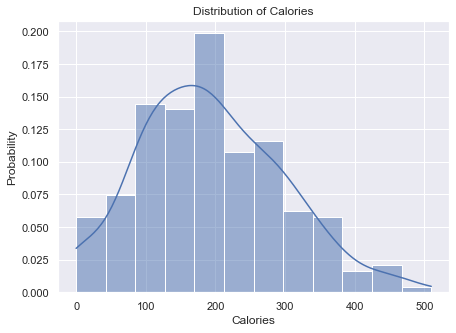

In [57]:
# height and width of the plot
# Below shows the histogram that we would like to make
# kde - makes the smooth line appear on top of data
plt.figure(figsize=(7,5)) 
sns.histplot(data=sb_full_menu, x='Calories', kde=True, stat='probability').set_title('Distribution of Calories')
plt.show() # Tells Python to create the plot

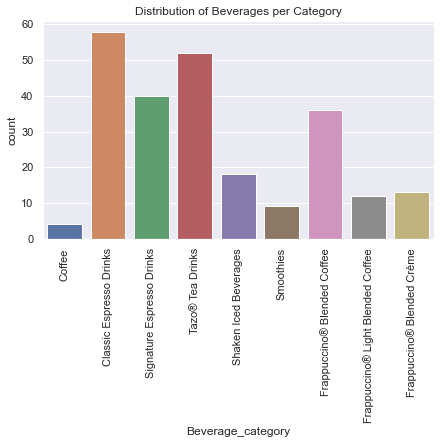

In [56]:
plt.figure(figsize=(7,4)) # Defines the height and width of the plot
sns.countplot(data=sb_full_menu, x='Beverage_category').set_title('Distribution of Beverages per Category')
plt.xticks(rotation=90) x-axis labels 90 degrees
plt.show()

In [46]:
top25_cal = sb_food_menu.sort_values(' Calories', ascending=False).head(25)
#find the top 25 highest calory food

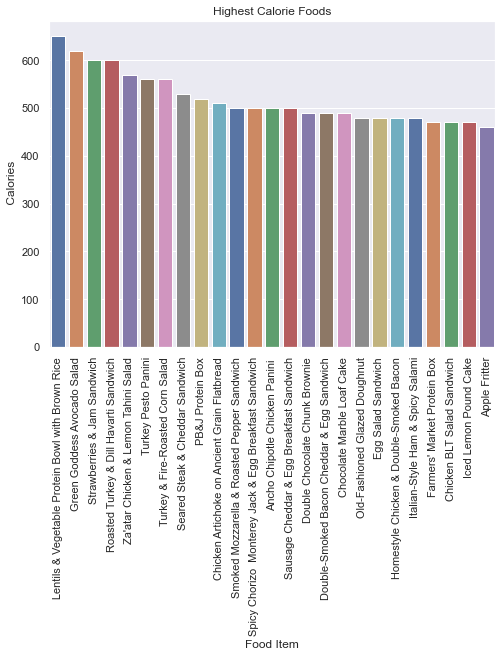

In [47]:
plt.figure(figsize=(8, 6))
sns.set_theme(style='darkgrid')
plot = sns.barplot(data=top25_cal, x='Unnamed: 0', y=' Calories', palette='deep')
plot.set(title='Highest Calorie Foods', xlabel='Food Item')
plt.xticks(rotation=90)
plt.show()

In [69]:
top10_sodium = sb_drink_menu.sort_values('Sodium', ascending=False).head(20)

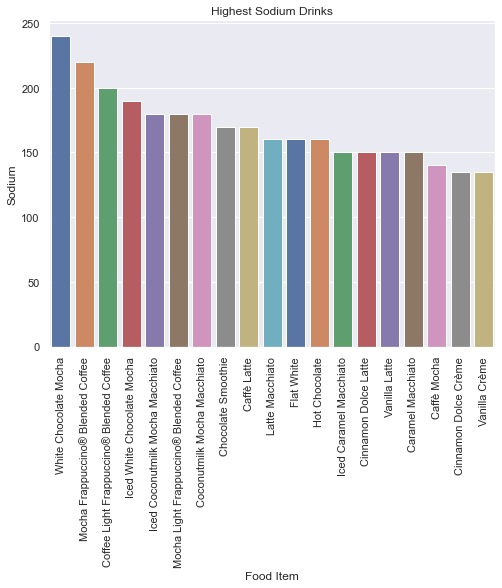

In [71]:
plt.figure(figsize=(8, 6))
sns.set_theme(style='darkgrid')
plot = sns.barplot(data=top10_sodium, x='Unnamed: 0', y='Sodium', palette='deep')
plot.set(title='Highest Sodium Drinks', xlabel='Food Item')
plt.xticks(rotation=90)
plt.show()

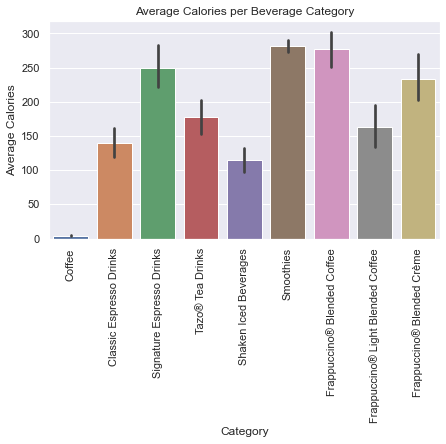

In [10]:
plt.figure(figsize=(7,4))
plot = sns.barplot(y=sb_full_menu['Calories'], x=sb_full_menu['Beverage_category']).set(xlabel='Category', ylabel='Average Calories', title='Average Calories per Beverage Category')
plt.xticks(rotation=90)
plt.show()

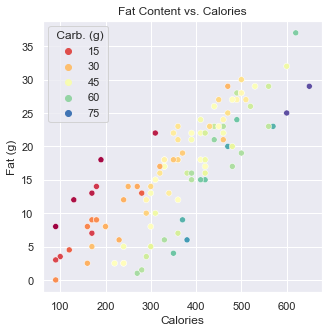

In [11]:
plt.figure(figsize=(5, 5))
sns.set_theme(style='darkgrid')
sns.scatterplot(data=sb_food_menu, x=' Calories', y=' Fat (g)', hue=' Carb. (g)', palette='Spectral').set(xlabel='Calories', ylabel='Fat (g)', title='Fat Content vs. Calories')
plt.show()

In [102]:
newmerge = sb_drink_menu.merge(sb_food_menu, how='outer')

In [103]:
newmerge

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium,Unnamed: 0.1,Calories,Fat (g),Carb. (g),Fiber (g),Protein (g)
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Iced Coffee,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Justin's Chocolate Hazelnut Butter,NaN,NaN,NaN,NaN,NaN,NaN,108.0,180.0,14.0,12.0,3.0,4.0
201,Justin's Classic Almond Butter,NaN,NaN,NaN,NaN,NaN,NaN,109.0,190.0,18.0,6.0,3.0,7.0
202,Lemon Chiffon Yogurt,NaN,NaN,NaN,NaN,NaN,NaN,110.0,340.0,13.0,38.0,0.0,18.0
203,Organic Avocado (Spread),NaN,NaN,NaN,NaN,NaN,NaN,111.0,90.0,8.0,5.0,4.0,1.0


In [29]:
averages = sb_full_menu.groupby('Beverage_category')['Calories'].mean()
#averages of groupby for bev category

In [31]:
averagesprep = sb_full_menu.groupby('Beverage_prep')['Calories'].mean()
# averages of groupby for bev preperation

In [34]:
averagesprep.head(20)

Beverage_prep
2% Milk               218.000000
Doppio                 10.000000
Grande                 85.714286
Grande Nonfat Milk    209.615385
Short                  37.000000
Short Nonfat Milk      99.166667
Solo                    5.000000
Soymilk               207.272727
Tall                   63.428571
Tall Nonfat Milk      147.826087
Venti                 118.571429
Venti Nonfat Milk     260.000000
Whole Milk            283.750000
Name: Calories, dtype: float64

In [43]:
averages.head(20)

Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64

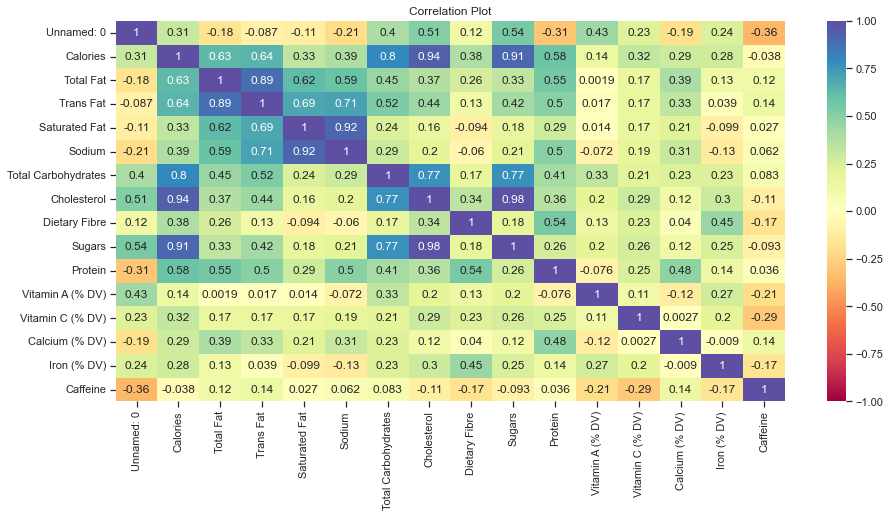

In [62]:
plt.figure(figsize=(15, 7))
corrplot = sns.heatmap(sb_full_menu.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot")
plt.show()

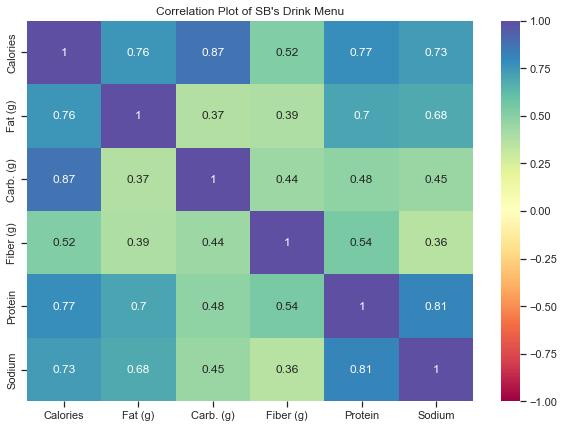

In [64]:
plt.figure(figsize=(10, 7))
corrplot = sns.heatmap(sb_drink_menu.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot of SB's Drink Menu")
plt.show()
#heatmap of drink menu

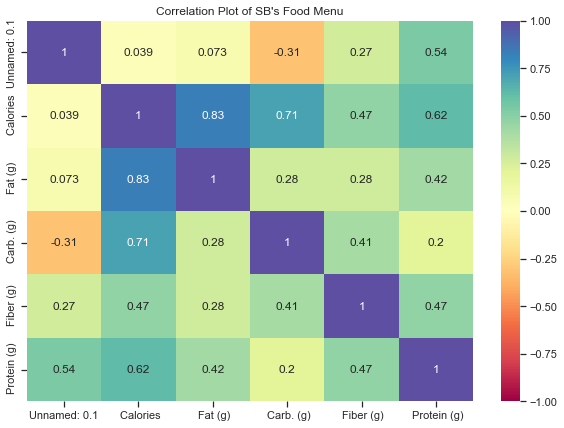

In [67]:
plt.figure(figsize=(10, 7))
corrplot = sns.heatmap(sb_food_menu.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral').set_title("Correlation Plot of SB's Food Menu")
plt.show()
#heatmap of food menu

In [95]:
highsugbev = sb_full_menu.sort_values('Sugars', ascending=False).head(20)

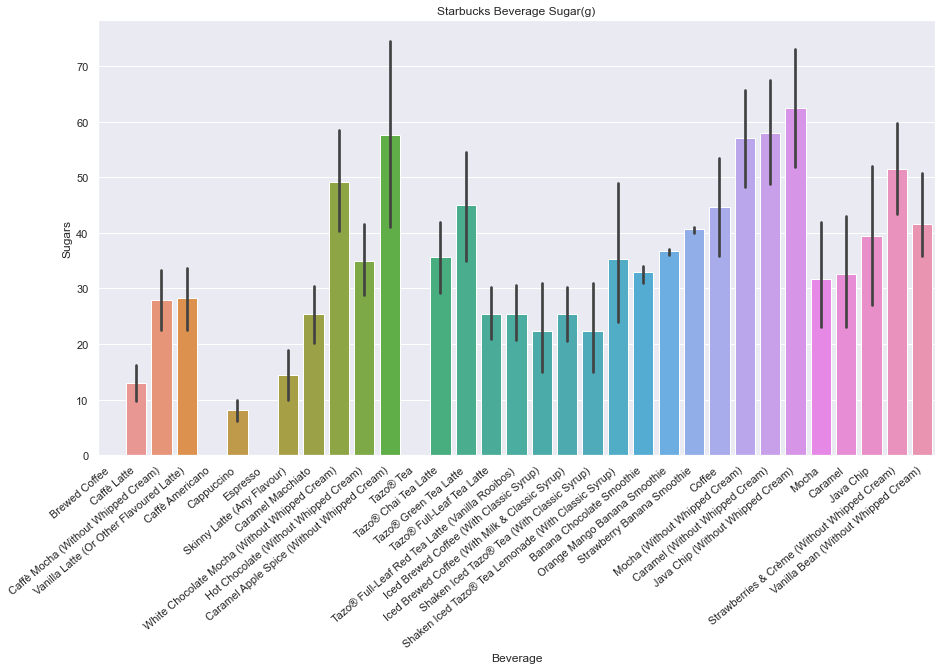

In [97]:
# data visualization to see the which Starbucks has the highest sugar
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Sugars", data=sb_full_menu)
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Sugar(g)")
plt.show()

#highest sugar in bev

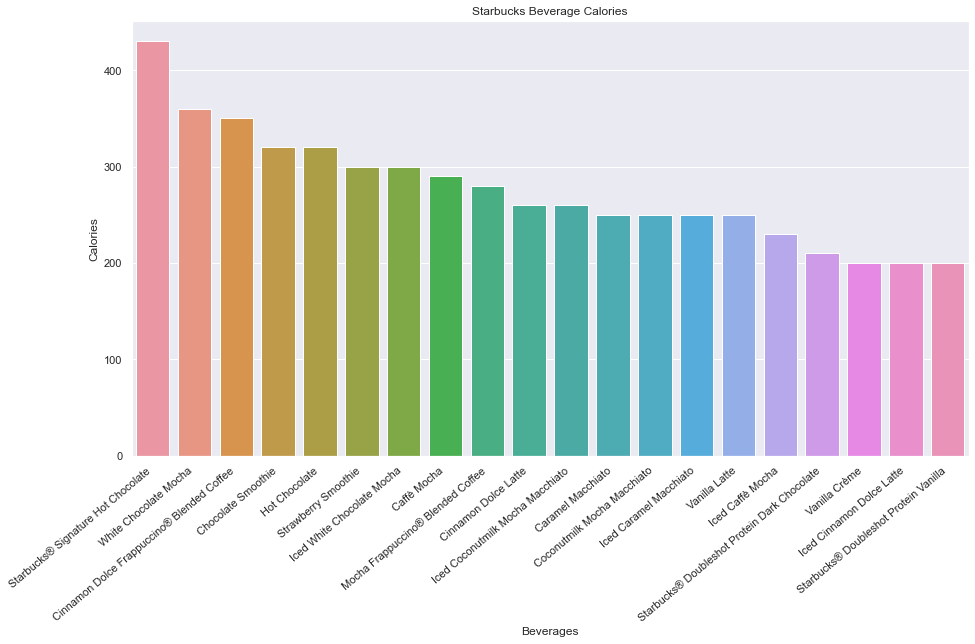

In [90]:
#to see the which Starbucks drink has the highest calories
plt.figure(figsize=(15, 8))
sns.barplot(x="Unnamed: 0", y="Calories", data=highcalbev).set(xlabel='Beverages')
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Calories")
plt.show()

# highest calories in bev

In [87]:
highcalbev = sb_drink_menu.sort_values('Calories', ascending=False).head(20)

In [98]:
highcafbev = sb_full_menu.sort_values('Caffeine', ascending=False).head(20)

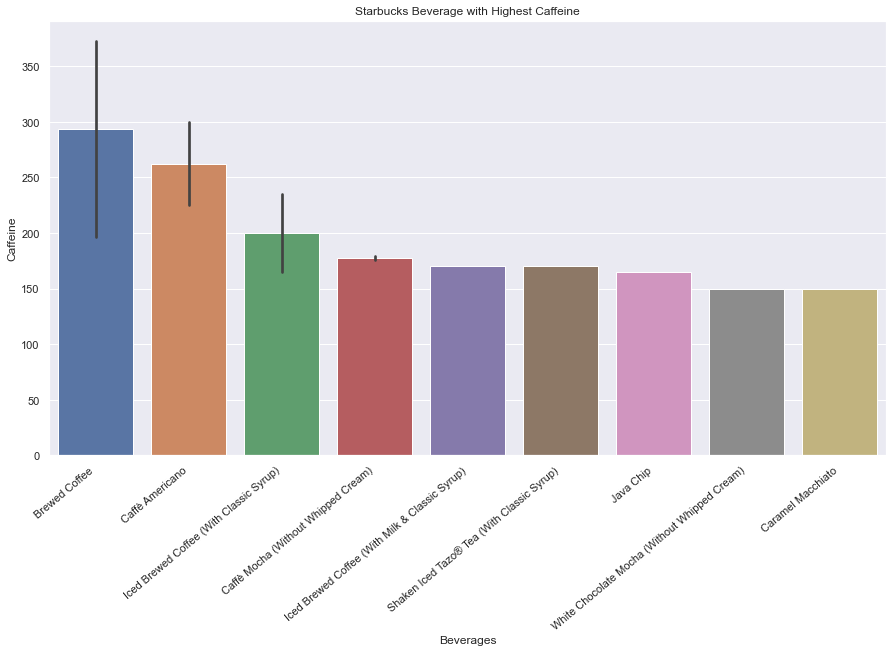

In [101]:
#to see the which Starbucks drink has the highest calories
plt.figure(figsize=(15, 8))
sns.barplot(x="Beverage", y="Caffeine", data=highcafbev).set(xlabel='Beverages')
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage with Highest Caffeine")
plt.show()